<a href="https://colab.research.google.com/github/ArunKuleri/DATA-SCIENCE/blob/main/facedetiectionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
import pathlib
import glob

In [4]:
batch_mates_path=pathlib.Path("/content/drive/MyDrive/batchmates")
batch_mates_path

PosixPath('/content/drive/MyDrive/batchmates')

In [5]:
adarshLi = list(batch_mates_path.glob('adarsh/*.jpg'))
anjaliLi = list(batch_mates_path.glob('anjali/*.jpg'))
arunLi = list(batch_mates_path.glob('arun/*.jpg'))
gauthamLi = list(batch_mates_path.glob('gautham/*.jpg'))
roshanLi  = list(batch_mates_path.glob('roshan/*.jpg'))
sanalLi = list(batch_mates_path.glob('sanal/*.jpg'))
saraniyaLi = list(batch_mates_path.glob('saraniya/*.jpg'))
subinLi = list(batch_mates_path.glob('subin/*.jpg'))

In [6]:
len(adarshLi)

238

In [7]:
batch_mate_dict = {"adarsh":adarshLi, "anjali":anjaliLi, "arun":arunLi,
                   "gautham":gauthamLi, "roshan":roshanLi, 'sanal':sanalLi,
                   "saraniya":saraniyaLi, "subin":subinLi}

In [8]:
batch_mate_class = {"adarsh":0,"anjali":1,"arun":2,
                    "gautham":3,"roshan":4,"sanal":5,
                    "saraniya":6,"subin":7}

In [9]:
img_set=[]

In [10]:

for i in batch_mate_dict:
  batch_name=i
  img_list=batch_mate_dict[batch_name]
  for path in img_list:
    img =cv2.imread(str(path))
    img = cv2.resize(img,(200,200))
    img= img/255
    img= np.array(img)
    img_set.append([img,batch_mate_class[batch_name]])

In [11]:
x=[]
y=[]

In [12]:
for pics,label in img_set:
  x.append(pics)
  y.append(label)

In [13]:
x = np.array(x)
y =np.array(y)

In [14]:
x.shape,y.shape

((2073, 200, 200, 3), (2073,))

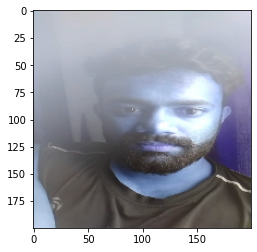

In [15]:
plt.imshow(x[1000])

In [16]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size = .28,random_state = 1) 

In [17]:
xtrain.shape

(1492, 200, 200, 3)

In [28]:
xtest.shape

(581, 200, 200, 3)

In [29]:
xtrain = xtrain.reshape(1492,200,200,3)
xtest = xtest.reshape(581,200,200,3)

In [30]:
model = Sequential()

In [35]:
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(200,200,3),strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())  
model.add(Dense(500,activation="relu"))
model.add(Dense(400,activation="relu"))
model.add(Dense(375,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(125,activation="relu"))

model.add(Dense(8,activation="softmax"))

model.summary() 
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

ValueError: ignored

In [33]:
hist=model.fit(xtrain,ytrain,epochs=5,batch_size=100,validation_data=(xtest,ytest))

Epoch 1/5
15/15 [==============================] - 197s 13s/step - loss: 2.0179 - accuracy: 0.2784 - val_loss: 0.0635 - val_accuracy: 0.9948
Epoch 2/5
15/15 [==============================] - 191s 13s/step - loss: 0.0171 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 0.9966
Epoch 3/5
15/15 [==============================] - 191s 13s/step - loss: 5.3005e-04 - accuracy: 1.0000 - val_loss: 5.6014e-08 - val_accuracy: 1.0000
Epoch 4/5
15/15 [==============================] - 191s 13s/step - loss: 4.4190e-04 - accuracy: 1.0000 - val_loss: 1.3760e-04 - val_accuracy: 1.0000
Epoch 5/5
15/15 [==============================] - 191s 13s/step - loss: 5.0756e-05 - accuracy: 1.0000 - val_loss: 2.3454e-04 - val_accuracy: 1.0000


In [34]:
y_pred=model.predict_classes(xtest)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 1, 0, 4, 6, 2, 3, 4, 5, 6, 5, 1, 6, 6, 1, 2, 1, 5, 4, 5, 3, 7,
       7, 2, 2, 2, 1, 5, 0, 3, 2, 6, 4, 2, 0, 4, 3, 2, 0, 3, 6, 3, 5, 6,
       5, 2, 7, 0, 3, 1, 0, 2, 3, 2, 3, 5, 6, 2, 4, 2, 3, 5, 0, 0, 5, 0,
       2, 6, 2, 3, 3, 1, 3, 3, 7, 6, 2, 4, 7, 6, 5, 0, 1, 6, 4, 6, 2, 5,
       6, 5, 4, 5, 4, 3, 7, 7, 4, 4, 7, 3, 4, 5, 7, 0, 4, 6, 3, 7, 4, 5,
       7, 2, 1, 6, 4, 5, 7, 2, 2, 6, 0, 4, 6, 7, 5, 1, 3, 6, 4, 6, 6, 4,
       2, 7, 5, 3, 2, 3, 0, 3, 6, 1, 1, 1, 5, 2, 1, 3, 5, 4, 5, 5, 6, 6,
       4, 3, 0, 3, 6, 3, 7, 5, 5, 7, 5, 6, 0, 7, 0, 2, 0, 3, 7, 2, 6, 0,
       5, 2, 0, 4, 2, 3, 0, 3, 3, 3, 7, 4, 2, 2, 1, 1, 4, 7, 6, 2, 2, 3,
       2, 6, 3, 7, 7, 3, 5, 2, 1, 6, 2, 5, 4, 1, 0, 4, 2, 4, 1, 4, 7, 5,
       1, 6, 3, 5, 4, 6, 4, 7, 3, 4, 5, 6, 4, 6, 2, 6, 4, 5, 7, 5, 2, 5,
       2, 6, 2, 2, 6, 3, 0, 4, 4, 6, 0, 6, 0, 1, 7, 4, 5, 5, 6, 0, 6, 2,
       6, 6, 3, 5, 6, 3, 6, 5, 5, 0, 6, 5, 4, 5, 0, 3, 6, 5, 3, 7, 0, 3,
       3, 0, 1, 4, 5, 7, 4, 6, 2, 0, 1, 5, 3, 6, 1,

In [36]:
ht=hist.history
ht

{'accuracy': [0.5093833804130554, 1.0, 1.0, 1.0, 1.0],
 'loss': [1.4681717157363892,
  0.006615048740059137,
  0.0007785466150380671,
  0.000827750947792083,
  9.438658889848739e-05],
 'val_accuracy': [0.9948365092277527, 0.9965576529502869, 1.0, 1.0, 1.0],
 'val_loss': [0.06352568417787552,
  0.004823680501431227,
  5.6013753635397734e-08,
  0.00013759764260612428,
  0.0002345422253711149]}

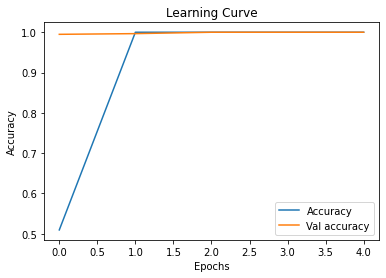

In [38]:
plt.plot(ht['accuracy'],label="Accuracy")
plt.plot(ht['val_accuracy'],label='Val accuracy')
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.title('Learning Curve')
plt.legend()

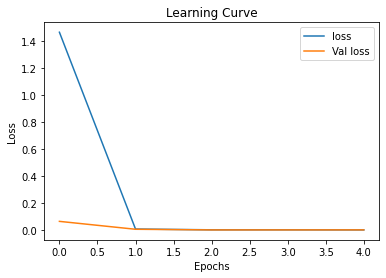

In [39]:
plt.plot(ht["loss"],label="loss")
plt.plot(ht['val_loss'],label="Val loss")
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()

In [41]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [43]:
cf=confusion_matrix(ytest,y_pred)

In [48]:
model.save('batch.h5')

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0ff0563d10>)

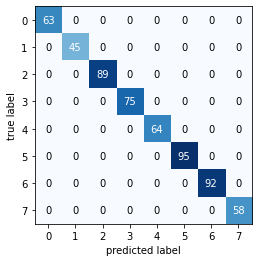

In [44]:
plot_confusion_matrix(cf)